In [1]:
import numpy as np
import pandas as pd

## Missing value Detection

In [95]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
...                        sborn=[pd.NaT, pd.Timestamp('1939-05-27'),
...                              pd.Timestamp('1940-04-25')],
...                        name=['Alfred', 'Batman', ''],
...                        toy=[None, 'Batmobile', 'Joker']))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     2 non-null      float64       
 1   born    2 non-null      datetime64[ns]
 2   name    3 non-null      object        
 3   toy     2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 224.0+ bytes


In [6]:
df.isna().sum()

age     1
born    1
name    0
toy     1
dtype: int64

In [16]:
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


### Drop Missing value

In [14]:
## Row level
df.dropna(axis =0)

,age,born,name,toy
1,6.0,1939-05-27,Batman,Batmobile


In [15]:
## Column Levels
df.dropna(axis =1, how = 'all')

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [18]:
## Row level + All missing value
df.dropna(axis =0, how= 'all')

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [19]:
## Column level + All missing value
df.dropna(axis =1, how= 'all')

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


## Missing value Imputation

In [20]:
##  Fillna 

df.fillna(0)

,age,born,name,toy
0,5.0,0,Alfred,0
1,6.0,1939-05-27 00:00:00,Batman,Batmobile
2,0.0,1940-04-25 00:00:00,,Joker


In [45]:
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,5.5,1940-04-25,,Joker


In [47]:
df.iloc[1,:]

age                     6.0
born    1939-05-27 00:00:00
name                 Batman
toy               Batmobile
Name: 1, dtype: object

In [65]:
df = pd.concat([df, df.iloc[1:,:]])

#### 3M for Missing value treatment

In [66]:
df.dtypes

age             float64
sborn    datetime64[ns]
name             object
toy              object
dtype: object

In [67]:
df['age'].fillna(df['age'].mean() , inplace= True)

In [68]:
df['toy'].value_counts().index[0]

'Batmobile'

In [69]:
df['toy'].fillna(df['toy'].value_counts().index[0],)

0    Batmobile
1    Batmobile
2        Joker
1    Batmobile
2        Joker
Name: toy, dtype: object

In [71]:
df

,age,sborn,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [72]:
df['sborn'].fillna(method= 'bfill')

0   1939-05-27
1   1939-05-27
2   1940-04-25
Name: sborn, dtype: datetime64[ns]

In [73]:
df['age'].fillna(method= 'ffill')

0    5.0
1    6.0
2    6.0
Name: age, dtype: float64

### SKlearn Imputer 

In [96]:
df

,age,sborn,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [91]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])


SimpleImputer(strategy='median')

In [92]:
imp.fit_transform(df[['age']])

array([[5. ],
       [6. ],
       [5.5]])

In [99]:
imp = SimpleImputer(missing_values= None, strategy='most_frequent')
imp.fit_transform(df[['toy']])

array([['Batmobile'],
       ['Batmobile'],
       ['Joker']], dtype=object)

### Multivariate feature imputation¶


In [100]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])


[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [102]:
data = np.array([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
data

array([[ 1.,  2.],
       [ 3.,  6.],
       [ 4.,  8.],
       [nan,  3.],
       [ 7., nan]])

In [103]:
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


### Nearest neighbors imputation

In [105]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], 
     [3, 4, 3], 
     [nan, 6, 5], 
     [8, 8, 7]]
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(X)

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

## Outlier Detection & Imputation

In [132]:
>>> df = pd.DataFrame(np.random.randn(100, 2),
...                   columns=['Col1', 'Col2'])


In [133]:
df.describe()

,Col1,Col2
count,100.000000,100.000000
mean,-0.018129,0.184245
std,1.040064,1.072785
min,-2.012653,-3.457791
25%,-0.777299,-0.571619
50%,-0.095587,0.192369
75%,0.783569,0.960464
max,2.127398,2.628477


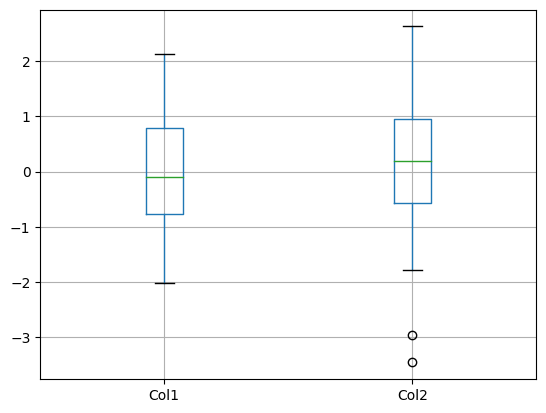

In [134]:
boxplot = df.boxplot()

In [116]:
#IQR = q3 - q1

In [139]:
q1 = np.percentile(df['Col2'],25)
q3 = np.percentile(df['Col2'],75)
IQR = q3 - q1

In [140]:
q3,q1, IQR

(0.9604636695841404, -0.5716191811092887, 1.532082850693429)

In [141]:
upper_range = q3 + 1.5*IQR
lower_range = q1 - 1.5*IQR

In [142]:
lower_range, upper_range

(-2.869743457149432, 3.2585879456242837)

In [144]:
df['Col2'].min(), df['Col2'].max(), 

(-3.4577912629009244, 2.6284774272023657)

<AxesSubplot:>

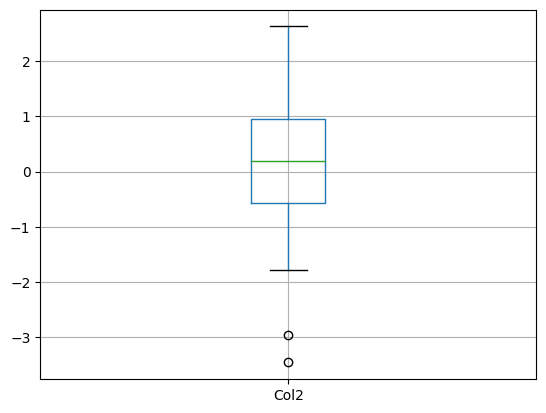

In [143]:
df[['Col2']].boxplot()

In [145]:
df.loc[df['Col2'] > upper_range, 'Col2' ] = upper_range
df.loc[df['Col2'] < lower_range, 'Col2' ] = lower_range

In [146]:
df['Col2'].min(), df['Col2'].max(), 

(-2.869743457149432, 2.6284774272023657)

<AxesSubplot:>

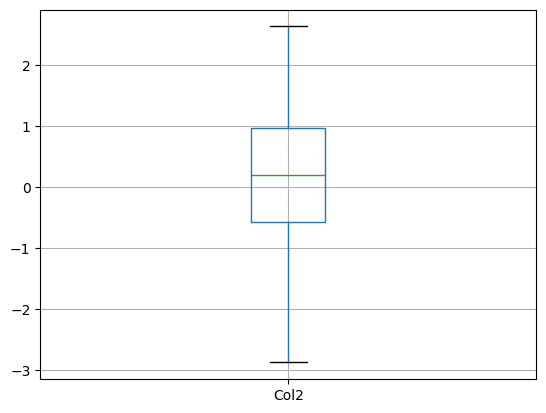

In [147]:
df[['Col2']].boxplot()